In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define the path to the animal image folders
base_folder = r'C:\Users\Vaibhav\OneDrive\Desktop\Nullclass_AnimalEmotion\animal_detection\train'



In [5]:
# List of animal emotion categories
categories = ['cats', 'dog', 'parrot', 'horse', 'hamster', 'sheep']

# Load and preprocess images for each animal class
images = []
labels = []

for label, category in enumerate(categories, 1):
    folder_path = os.path.join(base_folder, category)
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append(img)
            labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


In [8]:
# Normalize pixel values
images = images.astype('float32') / 255.0

# One-hot encode the labels
labels_one_hot = to_categorical(labels - 1, len(categories))  # Subtract 1 to start labels from 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
base_model.trainable = False

# Get the output tensor of the last convolutional layer in the base model
last_layer_output = base_model.output

# Flatten the output tensor
flatten_layer = Flatten()(last_layer_output)

# Add additional layers for classification
dense_layer_1 = Dense(256, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
output_layer = Dense(len(categories), activation='softmax')(dropout_layer)

# Create a new model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save("improved_animal_classification_model.h5")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 37s 1us/step
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2309 - loss: 2.1027 - val_accuracy: 0.3125 - val_loss: 1.6718
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2697 - loss: 1.7123 - val_accuracy: 0.2679 - val_loss: 1.6232
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2852 - loss: 1.6513 - val_accuracy: 0.2679 - val_loss: 1.6493
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3171 - loss: 1.6758 - val_accuracy: 0.2679 - val_loss: 1.6236
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2919 - loss: 1.6658 - val_accuracy: 0.2679 - val_loss: 1.6424
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3163 - loss: 1.6762 - val_accuracy: 0.2679 - val_loss: 1.6293
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2640 - loss: 1.6867 - val_accuracy: 0.2679 - val_loss: 1.6117
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.29

Test accuracy: 30.47%


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 982ms/step


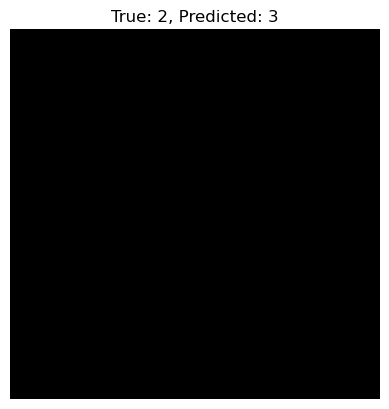

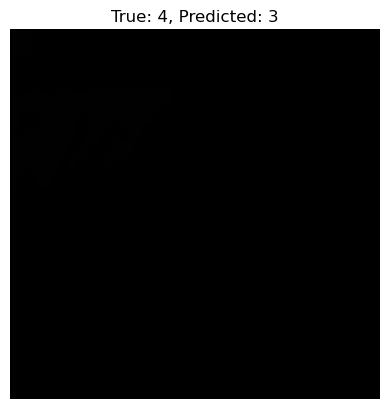

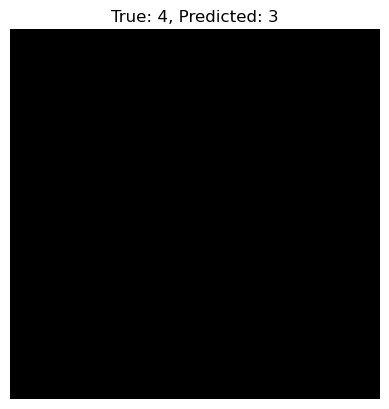

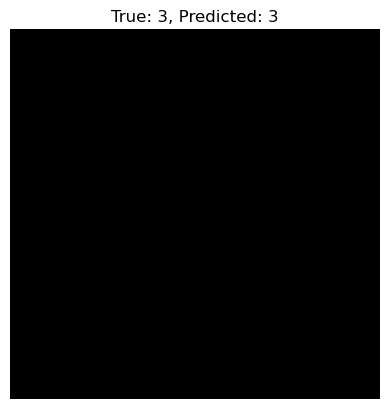

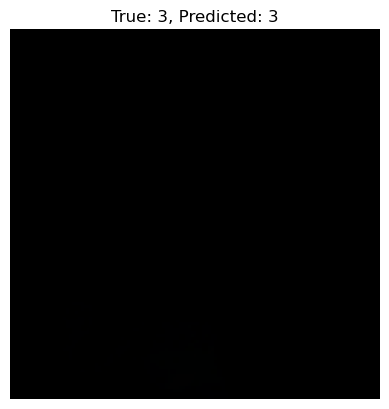

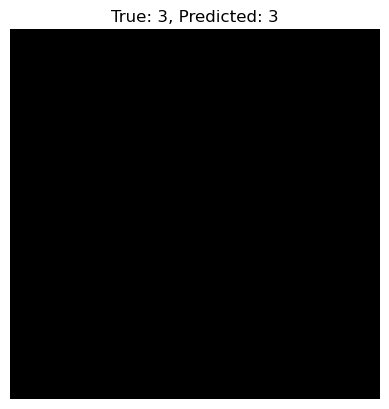

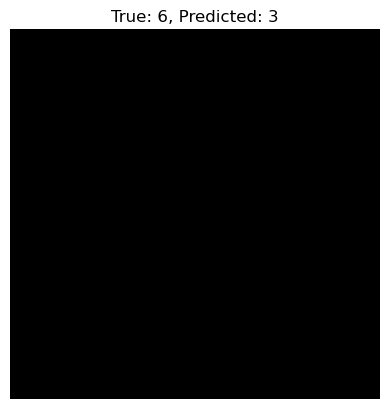

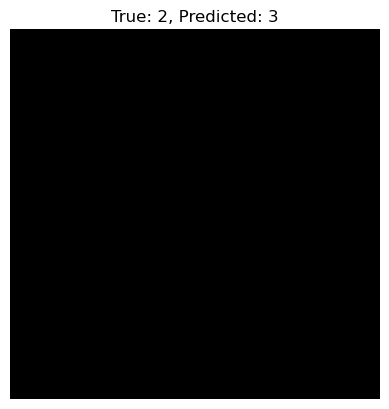

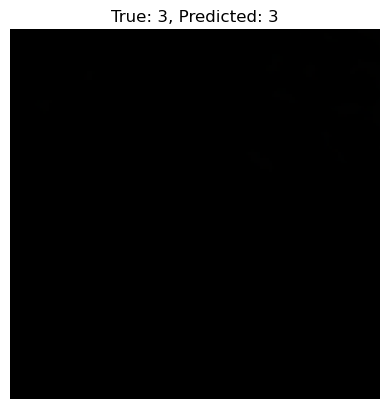

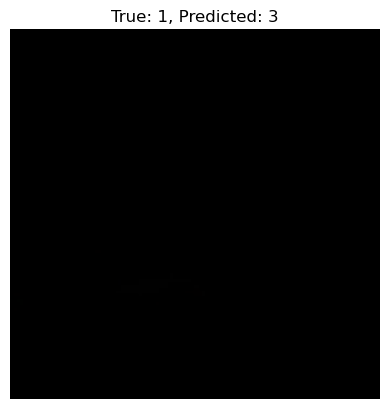

In [9]:
"""
Label Mapping:
- Label 1: Cat
- Label 2: Dog
- Label 3: Parrot
- Label 4: Horse
- Label 5: Hamster
- Label 6: Sheep
"""

import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1) + 1  # Convert one-hot encoded predictions to labels

# Convert one-hot encoded true labels to labels
true_labels = np.argmax(y_test, axis=1) + 1

# Visualize the first 10 test images with their predicted and true labels
for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()


In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define the path to the animal image folders
base_folder = r'C:\Users\Vaibhav\OneDrive\Desktop\Nullclass_AnimalEmotion\animal_detection\train'


# List of animal categories
categories = ['cats', 'dog', 'parrot', 'horse', 'hamster', 'sheep']

# Load and preprocess images for each animal class
images = []
labels = []

for label, category in enumerate(categories, 1):
    folder_path = os.path.join(base_folder, category)
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append(img)
            labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values
images = images.astype('float32') / 255.0

# One-hot encode the labels
labels_one_hot = to_categorical(labels - 1, len(categories))  # Subtract 1 to start labels from 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
base_model.trainable = False

# Get the output tensor of the last convolutional layer in the base model
last_layer_output = base_model.output

# Flatten the output tensor
flatten_layer = Flatten()(last_layer_output)

# Add additional layers for classification
dense_layer_1 = Dense(256, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
output_layer = Dense(len(categories), activation='softmax')(dropout_layer)

# Create a new model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save("improved_animal_classification_model.h5")


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3357 - loss: 2.7191 - val_accuracy: 0.5357 - val_loss: 1.1242
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6326 - loss: 1.0039 - val_accuracy: 0.6607 - val_loss: 0.9474
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7208 - loss: 0.8059 - val_accuracy: 0.6696 - val_loss: 0.8439
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7759 - loss: 0.6790 - val_accuracy: 0.6964 - val_loss: 0.7885
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8234 - loss: 0.5358 - val_accuracy: 0.6964 - val_loss: 0.8076
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8357 - loss: 0.4775 - val_accuracy: 0.7321 - val_loss: 0.7286
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8707 - loss: 0.3777 - val_accuracy: 0.6964 - val_loss: 0.7945
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8705 - loss: 0.3789 - val_accuracy: 0.7232 - val_loss:

Test accuracy: 78.14%
